# Machine Learning to Identify Fraud in Enron Corpus

### Final Project for Python for Data Science Course

#### Group Member:
- FATHIAH - 
- MATHEW GEORGE Jithin
- TIATSE SOUOP Varesse
- SZEPEK Maria Sofie

### Context and Enron Corpus

In late 2001, Enron, an American energy company, filed for bankruptcy after one of the largest financial scandals in corporate history. After the company's collapse, over 600,000 emails generated by 158 Enron employees - now known as the Enron Corpus - were acquired by the Federal Energy Regulatory Commission during its investigation. The data was then uploaded online, and since then, a number of people and organizations have graciously prepared, cleaned and organized the dataset that is available to the public today (a few years later, financial data of top Enron executives were released following their trial).

### Project Description and Goal

The aim of this project is to apply machine learning techniques to build a predictive model that identifies Enron employees that may have committed fraud based on their financial and email data.

The dataset has:
- 14 financial features (salary, bonus, etc.),
- 6 email features (to and from messages, etc.)
- A Boolean label that denotes whether a person is a person-of-interest (POI) or not (established from credible news sources).

It is these features that will be explored, cleaned, and then put through various machine learning algorithms, before finally tuning them and checking its accuracy (precision and recall).

##### The objective is to get a precision and recall score of at least 0.48

First, the dataset will be manually explored to find outliers and trends and generally understand the data. Certain useful financial or email-based features will be chosen (manually and automatically using sklearn functions) and ensemble features created from those available, and then put through
appropriate feature scaling. Then, numerous algorithms with parameter tuning will be trained and tested on the data.

The detailed results of the final algorithm, will be described in detail. The validation and evaluation metrics will be also shown and the reasoning behind their choice and its importance will be carefully explained. Finally, other ideas involving feature selection, feature scaling, other algorithms and usage
of email texts will be discussed.

## Initial Preparation/Importing Libraries

In [1]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import pandas as pd
import sys
import pickle
import csv
import matplotlib.pyplot as plt

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
#from poi_data import *
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from numpy import mean

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

## TASK 1: Features 

### Create features list and import necessary files

In [2]:
### Selecting features
target_label = 'poi'

email_features_list = [
    'from_messages',
    'from_poi_to_this_person',
    'from_this_person_to_poi',
    'shared_receipt_with_poi',
    'to_messages',
    ]
    
financial_features_list = [
    'bonus',
    'deferral_payments',
    'deferred_income',
    'director_fees',
    'exercised_stock_options',
    'expenses',
    'loan_advances',
    'long_term_incentive',
    'other',
    'restricted_stock',
    'restricted_stock_deferred',
    'salary',
    'total_payments',
    'total_stock_value',
]

features_list = [target_label] + financial_features_list + email_features_list

In [3]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [4]:
### 1.1.0 Explore csv file 
def make_csv(data_dict):
    """ generates a csv file from a data set"""
    fieldnames = ['name'] + data_dict.itervalues().next().keys()
    with open('data.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for record in data_dict:
            person = data_dict[record]
            person['name'] = record
            assert set(person.keys()) == set(fieldnames)
            writer.writerow(person)

### Initial data exploration

In [5]:
### 1.1.1 Dataset Exploration
print('# Exploratory Data Analysis #')
data_dict.keys()
print('Total number of data points: %d' % len(data_dict.keys()))
num_poi = 0
for name in data_dict.keys():
    if data_dict[name]['poi'] == True:
        num_poi += 1
print('Number of Persons of Interest: %d' % num_poi)
print('Number of people without Person of Interest label: %d' % (len(data_dict.keys()) - num_poi))

# Exploratory Data Analysis #
Total number of data points: 146
Number of Persons of Interest: 18
Number of people without Person of Interest label: 128


In [6]:
### 1.1.2 Feature Exploration
all_features = data_dict['ALLEN PHILLIP K'].keys()
print('Each person has %d features available' %  len(all_features))
### Evaluate dataset for completeness
missing_values = {}
for feature in all_features:
    missing_values[feature] = 0
for person in data_dict.keys():
    records = 0
    for feature in all_features:
        if data_dict[person][feature] == 'NaN':
            missing_values[feature] += 1
        else:
            records += 1

Each person has 21 features available


In [7]:
### Print results of completeness analysis
print('Number of Missing Values for Each Feature:')
for feature in all_features:
    print("%s: %d" % (feature, missing_values[feature]))

Number of Missing Values for Each Feature:
salary: 51
to_messages: 60
deferral_payments: 107
total_payments: 21
loan_advances: 142
bonus: 64
email_address: 35
restricted_stock_deferred: 128
deferred_income: 97
total_stock_value: 20
expenses: 51
from_poi_to_this_person: 60
exercised_stock_options: 44
from_messages: 60
other: 53
from_this_person_to_poi: 60
poi: 0
long_term_incentive: 80
shared_receipt_with_poi: 60
restricted_stock: 36
director_fees: 129


## TASK 2: Remove Outliers

We detect a few features with outliers and remove them to make the analysis more robust. 

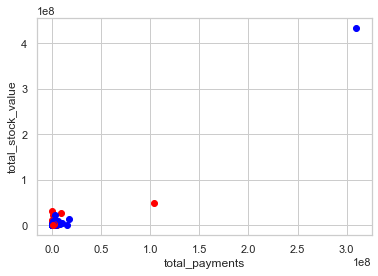

None


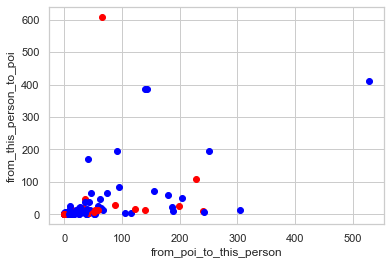

None


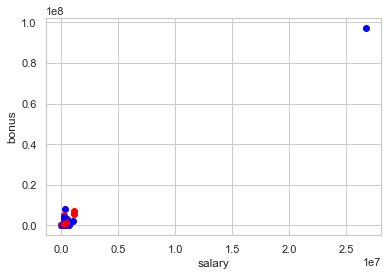

None


In [8]:
def PlotOutlier(data_dict, feature_x, feature_y):
    """ Plot with flag = True in Red """
    data = featureFormat(data_dict, [feature_x, feature_y, 'poi'])
    for point in data:
        x = point[0]
        y = point[1]
        poi = point[2]
        if poi:
            color = 'red'
        else:
            color = 'blue'
        plt.scatter(x, y, color=color)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()

# 2.1 Visualise outliers
print(PlotOutlier(data_dict, 'total_payments', 'total_stock_value'))
print(PlotOutlier(data_dict, 'from_poi_to_this_person', 'from_this_person_to_poi'))
print(PlotOutlier(data_dict, 'salary', 'bonus'))
#Remove outlier TOTAL line in pickle file.
data_dict.pop( 'TOTAL', 0 )


# 2.2 Function to remove outliers
def remove_outlier(dict_object, keys):
    """ removes list of outliers keys from dict object """
    for key in keys:
        dict_object.pop(key, 0)

outliers = ['TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E','FREVERT MARK A','LAVARATO JOHN J',"SKILLING JEFFREY K","LAY KENNETH L"]
remove_outlier(data_dict, outliers)

### Plotting after outliers removal

In [9]:
import matplotlib.pyplot
def showData(data_set, first_feature, second_feature):
    data = featureFormat(data_set, [first_feature, second_feature, 'poi'])
    for point in data:
        x = point[0]
        y = point[1]
        poi = point[2]
        if poi:
            color = 'red'
        else:
            color = 'blue'
        matplotlib.pyplot.scatter(x, y, color=color)

    matplotlib.pyplot.xlabel(first_feature)
    matplotlib.pyplot.ylabel(second_feature)
    matplotlib.pyplot.show()

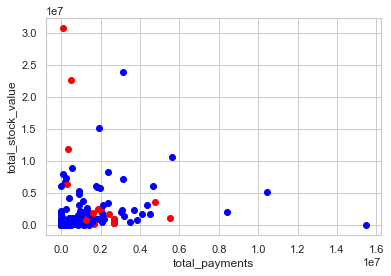

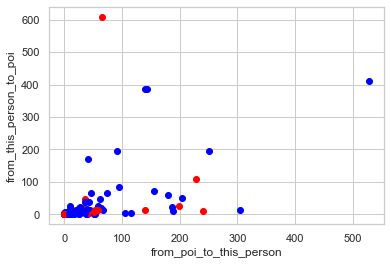

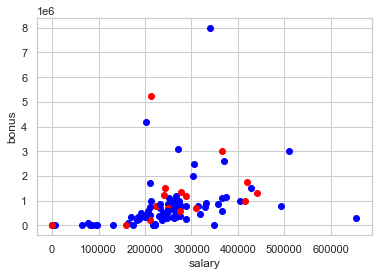

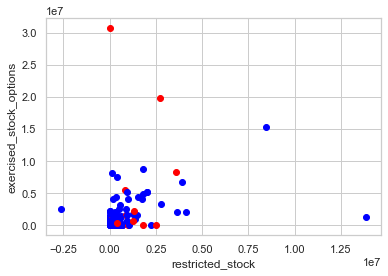

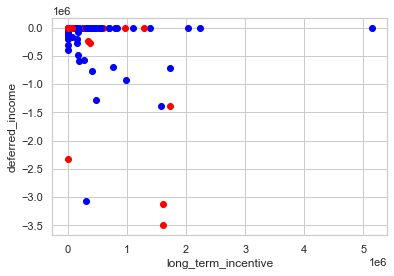

In [10]:
# Visualize data to identify outliers
# data_dict.T.to_dict
# data_dict.pop('LAY KENNETH L',0)
showData(data_dict, 'total_payments','total_stock_value')
showData(data_dict, 'from_poi_to_this_person', 'from_this_person_to_poi')
showData(data_dict, 'salary', 'bonus')
showData(data_dict, 'restricted_stock', 'exercised_stock_options')
showData(data_dict, 'long_term_incentive', 'deferred_income')

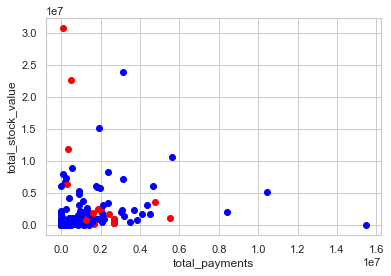

None


In [12]:
print(PlotOutlier(data_dict, 'total_payments', 'total_stock_value'))

In [13]:
### 1.1.0 Explore csv file 
def make_csv(data_dict):
    """ generates a csv file from a data set"""
    fieldnames = ['name'] + data_dict.itervalues().next().keys()
    with open('data.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for record in data_dict:
            person = data_dict[record]
            person['name'] = record
            assert set(person.keys()) == set(fieldnames)
            writer.writerow(person)

### 1.1.1 Dataset Exploration
print('# Exploratory Data Analysis #')
data_dict.keys()
print('Total number of data points: %d' % len(data_dict.keys()))
num_poi = 0
for name in data_dict.keys():
    if data_dict[name]['poi'] == True:
        num_poi += 1
print('Number of Persons of Interest: %d' % num_poi)
print('Number of people without Person of Interest label: %d' % (len(data_dict.keys()) - num_poi))


###1.1.2 Feature Exploration
all_features = data_dict['ALLEN PHILLIP K'].keys()
print('Each person has %d features available' %  len(all_features))
### Evaluate dataset for completeness
missing_values = {}
for feature in all_features:
    missing_values[feature] = 0
for person in data_dict.keys():
    records = 0
    for feature in all_features:
        if data_dict[person][feature] == 'NaN':
            missing_values[feature] += 1
        else:
            records += 1

### Print results of completeness analysis
print('Number of Missing Values for Each Feature:')
for feature in all_features:
    print("%s: %d" % (feature, missing_values[feature]))

#%%

# Exploratory Data Analysis #
Total number of data points: 140
Number of Persons of Interest: 16
Number of people without Person of Interest label: 124
Each person has 21 features available
Number of Missing Values for Each Feature:
salary: 49
to_messages: 57
deferral_payments: 104
total_payments: 20
loan_advances: 139
bonus: 62
email_address: 32
restricted_stock_deferred: 123
deferred_income: 94
total_stock_value: 18
expenses: 49
from_poi_to_this_person: 57
exercised_stock_options: 42
from_messages: 57
other: 52
from_this_person_to_poi: 57
poi: 0
long_term_incentive: 78
shared_receipt_with_poi: 57
restricted_stock: 34
director_fees: 124


### Data Frame

In [14]:
df=pd.DataFrame.from_dict(data_dict, orient = 'index')
# data=df.T
df.replace('nan',np.nan)
df.replace(to_replace='NaN', value=np.nan, inplace=True)
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,NaN,1061827.0,NaN,600000.0,mark.metts@enron.com,NaN,NaN,585062.0,...,38.0,NaN,29.0,1740.0,1.0,False,NaN,702.0,585062.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,...,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
ELLIOTT STEVEN,170941.0,NaN,NaN,211725.0,NaN,350000.0,steven.elliott@enron.com,NaN,-400729.0,6678735.0,...,NaN,4890344.0,NaN,12961.0,NaN,False,NaN,NaN,1788391.0,NaN
CORDES WILLIAM R,NaN,764.0,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185.0,...,10.0,651850.0,12.0,NaN,0.0,False,NaN,58.0,386335.0,NaN
HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,NaN,1500000.0,kevin.hannon@enron.com,NaN,-3117011.0,6391065.0,...,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,NaN


In [15]:
df.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
email_address                 object
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
dtype: object

In [16]:
# for col in ['from_messages','from_poi_to_this_person','from_this_person_to_poi',
#     'shared_receipt_with_poi',
#     'to_messages',
#     'bonus',
#     'deferral_payments',
#     'deferred_income',
#     'director_fees',
#     'exercised_stock_options',
#     'expenses',
#     'long_term_incentive',
#     'other',
#     'restricted_stock',
#     'salary',
#     'total_payments',
#     'total_stock_value']:
#     df[col] = df[col].astype('int')

###  Correlation Matrix

We want to see the correlation between the missing values in order to see if the missing values are related to one another. The result shows the missing value as the white part. The missing data mechanism that we found is MAR and MCAR. 

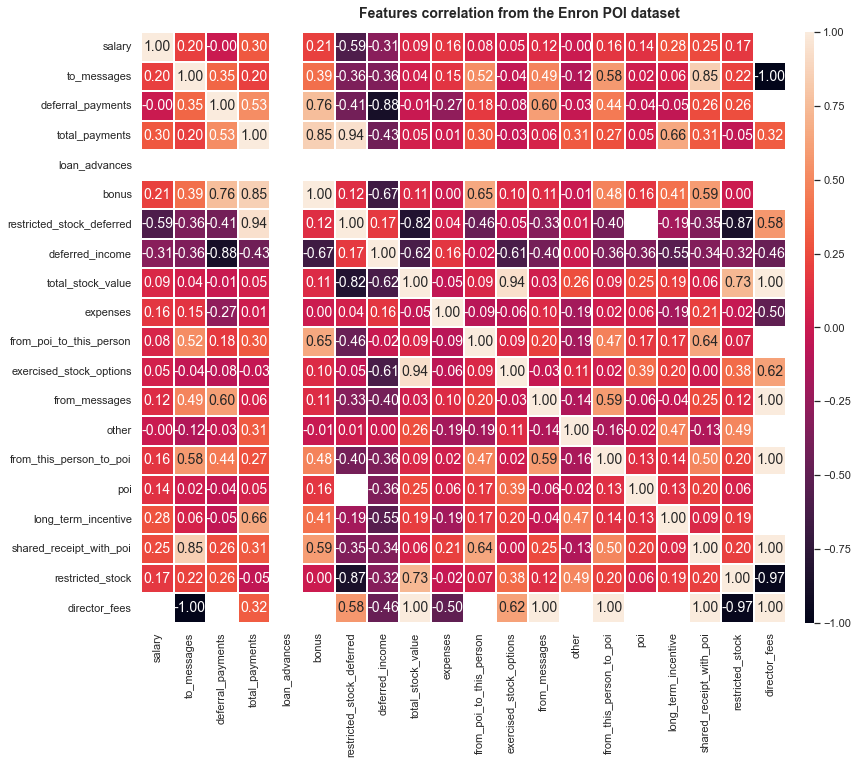

In [17]:
# data_without_na=data.dropna()

# f, ax = plt.subplots(figsize=(10, 8))
# corr = df.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
#             cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
# # sns.heatmap(corr)
# corr

import seaborn as sns
dfp=df.drop(['poi'], axis=1)
## Calculating the correlation among features by Pearson method
correlationDataframe = df.corr()

# Drawing a heatmap with the numeric values in each cell
fig1, ax = plt.subplots(figsize=(14,10))
fig1.subplots_adjust(top=.945)
plt.suptitle('Features correlation from the Enron POI dataset', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"vertical", 'pad':0.025, 'aspect':70}
sns.heatmap(correlationDataframe, annot=True, fmt='.2f', linewidths=.3, ax=ax, cbar_kws=cbar_kws);

In [18]:
df['poi'].head()

METTS MARK          False
BAXTER JOHN C       False
ELLIOTT STEVEN      False
CORDES WILLIAM R    False
HANNON KEVIN P       True
Name: poi, dtype: bool

<AxesSubplot:>

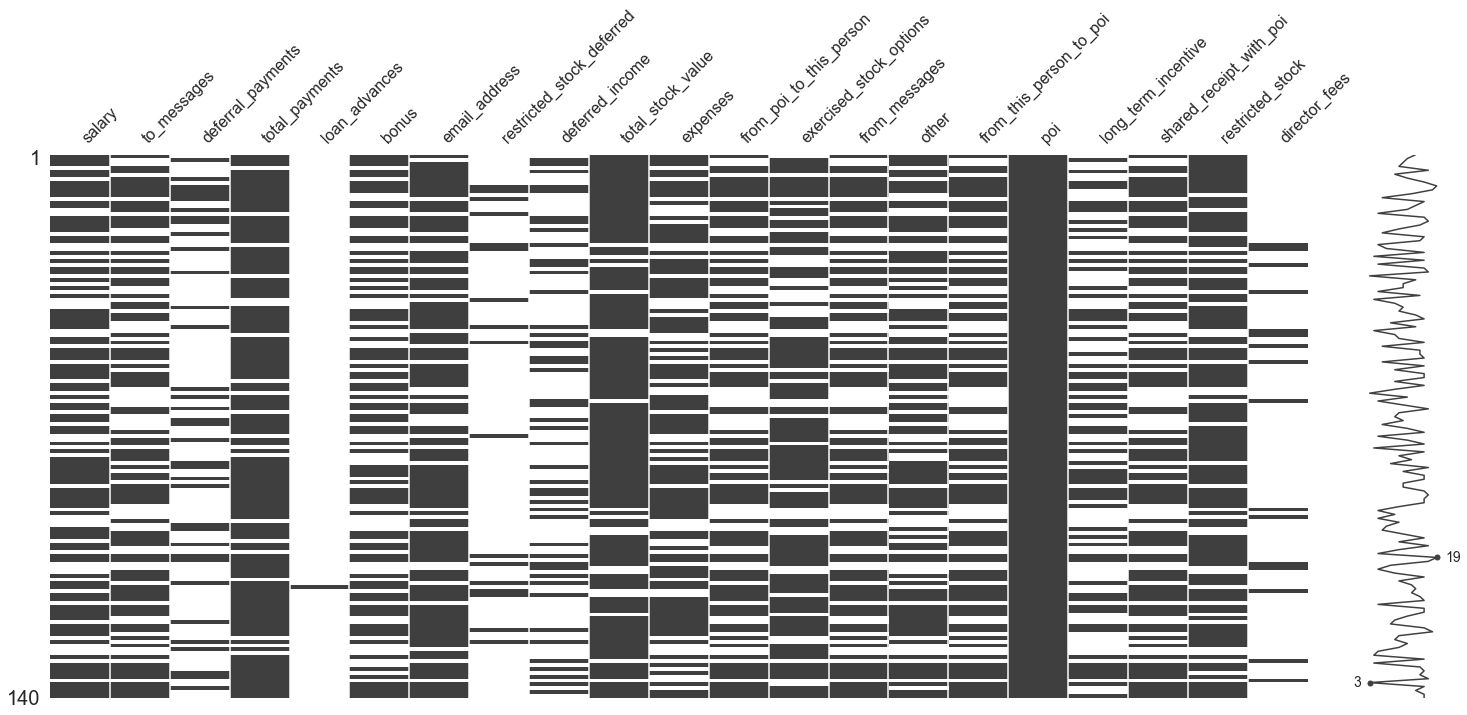

In [19]:
import missingno as msno  # # pip install missingno

# Plot correlation heatmap of missingness
msno.matrix(df)

<AxesSubplot:>

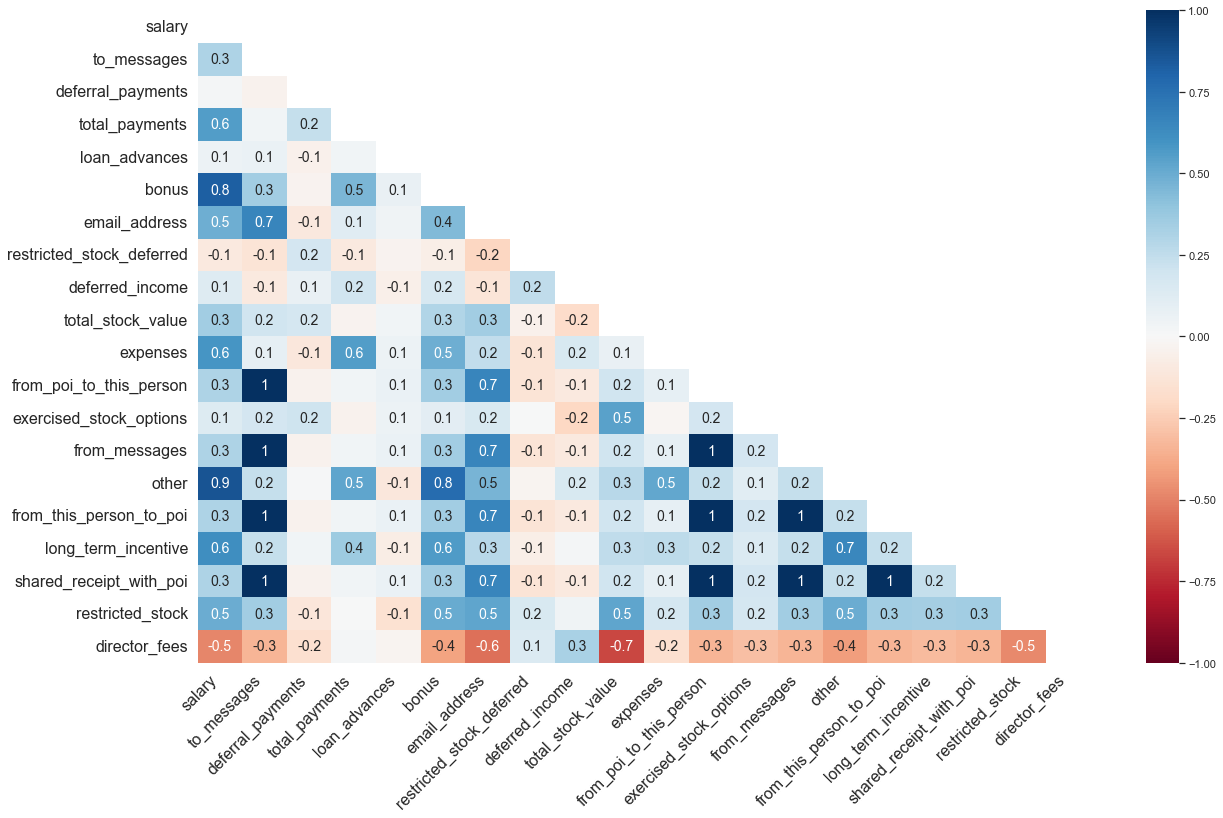

In [20]:
msno.heatmap(df)

In [21]:
df.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
email_address                 object
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
dtype: object

### Removing the columns with missing values

Based on the above plots, we are removing the columns 'loan_advances', 'restricted_stock_deferred' and 'director_fees' as they have a lot of missing values.

In [22]:
df_min = df[['from_messages',
      'from_poi_to_this_person',
      'from_this_person_to_poi',
    'shared_receipt_with_poi',
    'to_messages',
    'bonus',
    'deferral_payments',
    'deferred_income',
    'exercised_stock_options',
    'expenses',
    'long_term_incentive',
    'other',
    'restricted_stock',
    'salary',
    'total_payments',
    'total_stock_value',
           ]]

Seeing the index because we will retransform the dataset into a dictionary.

In [23]:
df.index

Index(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R',
       'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G',
       'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F',
       ...
       'SAVAGE FRANK', 'IZZO LAWRENCE L', 'TILNEY ELIZABETH A',
       'MARTIN AMANDA K', 'BUY RICHARD B', 'GRAMM WENDY L', 'CAUSEY RICHARD A',
       'TAYLOR MITCHELL S', 'DONAHUE JR JEFFREY M', 'GLISAN JR BEN F'],
      dtype='object', length=140)

We are using iterative imputer which fills the missing values using k-Nearest Neighbors. Two samples are close if the features that neither is missing are close.

In [24]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
# df_no_na = df.dropna()
imp_mean.fit(df_min)
x = imp_mean.transform(df_min)


In [25]:
df.poi

METTS MARK              False
BAXTER JOHN C           False
ELLIOTT STEVEN          False
CORDES WILLIAM R        False
HANNON KEVIN P           True
                        ...  
GRAMM WENDY L           False
CAUSEY RICHARD A         True
TAYLOR MITCHELL S       False
DONAHUE JR JEFFREY M    False
GLISAN JR BEN F          True
Name: poi, Length: 140, dtype: bool

In [26]:
len(x)

140

In [27]:
len(x[0])

16

### Dataset with filled missing values

In [28]:
df_new = pd.DataFrame(x, index = df.index,
                      columns =['from_messages',
      'from_poi_to_this_person',
      'from_this_person_to_poi',
    'shared_receipt_with_poi',
    'to_messages',
    'bonus',
    'deferral_payments',
    'deferred_income',
    'exercised_stock_options',
    'expenses',
    'long_term_incentive',
    'other',
    'restricted_stock',
    'salary',
    'total_payments',
    'total_stock_value',
           ])
df_new.head()

,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value
METTS MARK,29.000000,38.000000,1.000000,702.000000,807.000000,6.000000e+05,5.424754e+05,-3.482031e+05,1.922495e+05,94299.000000,2.046317e+05,1.740000e+03,585062.0,365788.000000,1.061827e+06,585062.0
BAXTER JOHN C,506.993792,32.373317,42.302274,1539.311095,3139.947013,1.200000e+06,1.295738e+06,-1.386055e+06,6.680544e+06,11200.000000,1.586055e+06,2.660303e+06,3942714.0,267102.000000,5.634343e+06,10623258.0
ELLIOTT STEVEN,891.916031,81.025856,61.278353,1015.182259,1836.001065,3.500000e+05,5.589034e+05,-4.007290e+05,4.890344e+06,78552.000000,-4.963808e+05,1.296100e+04,1788391.0,170941.000000,2.117250e+05,6678735.0
CORDES WILLIAM R,12.000000,10.000000,0.000000,58.000000,764.000000,1.132779e+06,6.348335e+05,-4.378560e+05,6.518500e+05,50210.811483,5.055084e+05,1.925115e+05,386335.0,251595.834341,2.105577e+06,1038185.0
HANNON KEVIN P,32.000000,32.000000,21.000000,1035.000000,1045.000000,1.500000e+06,9.966086e+04,-3.117011e+06,5.538001e+06,34039.000000,1.617011e+06,1.135000e+04,853064.0,243293.000000,2.886820e+05,6391065.0


As there are some negative values in the new dataset, we plot the distribution of the new variables using histogram to see the distribution of each variable.

array([[<AxesSubplot:title={'center':'from_messages'}>,
        <AxesSubplot:title={'center':'from_poi_to_this_person'}>,
        <AxesSubplot:title={'center':'from_this_person_to_poi'}>,
        <AxesSubplot:title={'center':'shared_receipt_with_poi'}>],
       [<AxesSubplot:title={'center':'to_messages'}>,
        <AxesSubplot:title={'center':'bonus'}>,
        <AxesSubplot:title={'center':'deferral_payments'}>,
        <AxesSubplot:title={'center':'deferred_income'}>],
       [<AxesSubplot:title={'center':'exercised_stock_options'}>,
        <AxesSubplot:title={'center':'expenses'}>,
        <AxesSubplot:title={'center':'long_term_incentive'}>,
        <AxesSubplot:title={'center':'other'}>],
       [<AxesSubplot:title={'center':'restricted_stock'}>,
        <AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'total_payments'}>,
        <AxesSubplot:title={'center':'total_stock_value'}>]], dtype=object)

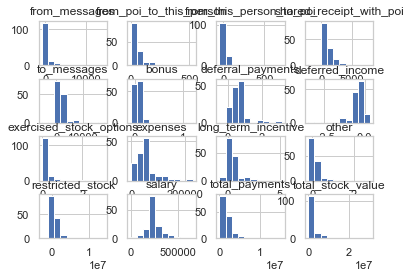

In [29]:
df_new.hist()

<AxesSubplot:>

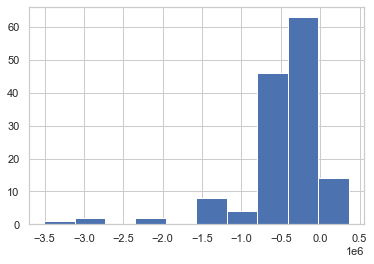

In [30]:
df_new['deferred_income'].hist()

Deferred income has some negative values, therefore we can get rid of the data. We proceed with concatination to remove categorical variable before removing the missing values.

In [31]:
print(len(pd.concat([df_new, df.poi],axis=1)))
df_good = pd.concat([df_new, df.poi],axis=1)
df_good.head(10)

140


,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,poi
METTS MARK,29.000000,38.000000,1.000000,702.000000,807.000000,6.000000e+05,5.424754e+05,-3.482031e+05,1.922495e+05,94299.000000,2.046317e+05,1.740000e+03,585062.0,365788.000000,1.061827e+06,585062.0,False
BAXTER JOHN C,506.993792,32.373317,42.302274,1539.311095,3139.947013,1.200000e+06,1.295738e+06,-1.386055e+06,6.680544e+06,11200.000000,1.586055e+06,2.660303e+06,3942714.0,267102.000000,5.634343e+06,10623258.0,False
ELLIOTT STEVEN,891.916031,81.025856,61.278353,1015.182259,1836.001065,3.500000e+05,5.589034e+05,-4.007290e+05,4.890344e+06,78552.000000,-4.963808e+05,1.296100e+04,1788391.0,170941.000000,2.117250e+05,6678735.0,False
CORDES WILLIAM R,12.000000,10.000000,0.000000,58.000000,764.000000,1.132779e+06,6.348335e+05,-4.378560e+05,6.518500e+05,50210.811483,5.055084e+05,1.925115e+05,386335.0,251595.834341,2.105577e+06,1038185.0,False
HANNON KEVIN P,32.000000,32.000000,21.000000,1035.000000,1045.000000,1.500000e+06,9.966086e+04,-3.117011e+06,5.538001e+06,34039.000000,1.617011e+06,1.135000e+04,853064.0,243293.000000,2.886820e+05,6391065.0,True
MORDAUNT KRISTINA M,470.520116,36.648284,4.254155,694.429405,1312.416655,3.250000e+05,5.098997e+05,-3.580215e+05,1.753347e+05,35018.000000,1.155066e+05,1.411000e+03,208510.0,267093.000000,6.285220e+05,208510.0,False
MEYER ROCKFORD G,28.000000,0.000000,0.000000,22.000000,232.000000,5.491084e+05,1.848227e+06,-6.878047e+05,4.934890e+05,48420.342355,-2.025494e+05,9.016209e+03,462384.0,157582.373820,1.848227e+06,955873.0,False
MCMAHON JEFFREY,48.000000,58.000000,26.000000,2228.000000,2355.000000,2.600000e+06,8.423439e+05,-4.512369e+05,1.104054e+06,137108.000000,6.948620e+05,2.973530e+05,558801.0,370448.000000,4.099771e+06,1662855.0,False
HAEDICKE MARK E,1941.000000,180.000000,61.000000,1847.000000,4009.000000,1.150000e+06,2.157527e+06,-9.344840e+05,6.087500e+05,76169.000000,9.833460e+05,5.238200e+04,524169.0,374125.000000,3.859065e+06,803094.0,False
PIPER GREGORY F,222.000000,61.000000,48.000000,742.000000,1238.000000,4.000000e+05,1.130036e+06,-3.333300e+04,8.802900e+05,43057.000000,1.501094e+05,7.780000e+02,409554.0,197091.000000,1.737629e+06,880290.0,False


### Treating imbalanced data

The data is imbalanced, which means that the people with POI is smaller than the people without POI. Using SMOTE in imblearn, we use knn method to create new value of POI person. The result shoes the same number of non POI and POI, which means it becomes balanced.

In [32]:
X = df_good.loc[:, df_good.columns != 'poi']
y = df_good.loc[:, df_good.columns == 'poi']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['poi'])
# we can Check the numbers of our data
print("length of the oversampled ",len(os_data_X))
print("Number non poi of the oversampled ",len(os_data_y[os_data_y['poi']==0]))
print("Number poi of the oversampled ",len(os_data_y[os_data_y['poi']==1]))
print("Proportion of non poi of the oversampled ",len(os_data_y[os_data_y['poi']==0])/len(os_data_X))
print("Proportion of poi of the oversampled ",len(os_data_y[os_data_y['poi']==1])/len(os_data_X))

length of the oversampled  170
Number non poi of the oversampled  85
Number poi of the oversampled  85
Proportion of non poi of the oversampled  0.5
Proportion of poi of the oversampled  0.5


Using os data, we can see the statistical description of each variable. The plot shows that the distribution is now balanced.

In [33]:
os_data_X.describe()

,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value
count,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,170.000000,1.700000e+02,1.700000e+02,1.700000e+02,170.000000,1.700000e+02,1.700000e+02
mean,514.112374,66.544017,38.310794,1235.556688,1953.361735,8.900065e+05,5.950172e+05,-6.552229e+05,2.282517e+06,61485.507506,5.710302e+05,2.623367e+05,1.019263e+06,262663.002208,1.757308e+06,3.165747e+06
std,1376.696442,66.799277,79.291275,1115.140054,2099.387532,1.315681e+06,4.453659e+05,7.403232e+05,4.806739e+06,38303.013370,6.318915e+05,4.106036e+05,1.346093e+06,73094.844780,1.701596e+06,5.207253e+06
min,-904.916759,0.000000,-44.693523,-1478.340680,-3855.469520,-8.229914e+05,-4.934477e+05,-3.504386e+06,-2.625954e+05,-2843.484981,-8.033344e+05,-1.979328e+05,-2.604490e+06,6615.000000,1.480000e+02,4.730400e+04
25%,34.314445,32.275785,8.019249,567.627194,908.875115,4.000000e+05,4.206929e+05,-7.084078e+05,1.914623e+05,36302.981759,2.370959e+05,5.836888e+03,3.250047e+05,222522.412713,8.575077e+05,6.700083e+05
50%,203.702448,49.930550,15.959096,1048.303930,1603.816164,7.500000e+05,5.797645e+05,-3.986434e+05,6.391612e+05,51812.319322,3.974063e+05,1.373016e+05,6.659395e+05,248281.500000,1.630172e+06,1.439086e+06
75%,518.626694,77.457110,37.480373,1599.465239,2487.063574,1.127119e+06,6.495676e+05,-2.630834e+05,1.747710e+06,81361.250000,6.936051e+05,3.008775e+05,1.285478e+06,287118.584932,2.162390e+06,2.513109e+06
max,14368.000000,528.000000,705.811251,8086.412536,16311.246898,1.196123e+07,3.131860e+06,3.598140e+05,3.076606e+07,228763.000000,5.145434e+06,2.818454e+06,1.384707e+07,518753.382448,1.545629e+07,3.076606e+07


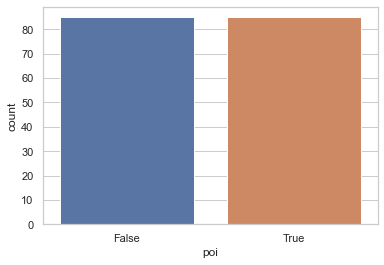

In [34]:
sns.countplot(x='poi',data=os_data_y)
plt.show()

In [35]:
#  len(os_data_y)

### Turning data into dictionary
We turn the data into dictionary to match picklefind dictionary from the function created. 

In [37]:
data_dict_new = pd.concat([os_data_X, os_data_y],axis=1)
data_dict_new.head(10)

,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,poi
0,206.131221,46.098488,15.190182,449.710520,919.381935,2.000000e+05,2.040750e+05,9.719414e+04,2.549361e+06,57727.000000,1.750000e+05,2630.000000,514847.0,236457.000000,8.758890e+05,3064208.0,False
1,63.000000,305.000000,14.000000,1902.000000,2572.000000,6.000000e+05,5.695834e+05,-5.041136e+05,1.550019e+06,3475.000000,5.564160e+05,473.000000,315068.0,250100.000000,1.410464e+06,1865087.0,False
2,125.000000,0.000000,0.000000,23.000000,1088.000000,5.000000e+05,5.345375e+05,-4.134799e+05,8.254640e+05,600.000000,3.048050e+05,1215.000000,189041.0,248017.000000,1.054637e+06,1014505.0,False
3,1073.000000,44.000000,15.000000,1074.000000,2350.000000,9.498732e+05,3.131860e+06,-1.319166e+06,5.210569e+06,76410.059647,-8.033344e+05,402837.331724,2046079.0,189368.624721,3.131860e+06,7256648.0,False
4,510.466039,47.026025,20.534457,454.308875,1024.783145,8.498489e+04,5.643480e+05,-3.081088e+05,8.862310e+05,37654.979701,2.703829e+05,-197932.827083,208809.0,164988.812676,5.643480e+05,1095040.0,False
5,1144.980112,71.626810,108.617769,2500.849683,4583.291875,1.300000e+06,5.897048e+05,-1.386055e+06,2.693050e+05,55921.000000,1.736055e+06,277464.000000,1794412.0,440698.000000,2.424083e+06,1794412.0,True
6,1053.000000,156.000000,71.000000,2333.000000,3523.000000,9.000000e+05,6.495840e+05,-6.948620e+05,2.542813e+06,161184.539272,7.698620e+05,400572.000000,901657.0,330546.000000,2.355702e+06,3444470.0,False
7,38.000000,37.000000,13.000000,2565.000000,2647.000000,7.000000e+05,6.285168e+05,-3.900556e+05,9.676924e+04,58547.028807,4.764510e+05,111122.000000,698920.0,257486.000000,1.545059e+06,698920.0,False
8,74.000000,115.000000,4.000000,552.000000,714.000000,6.000000e+05,5.726972e+05,-3.883263e+05,1.737800e+04,41626.000000,3.353490e+05,25553.000000,141833.0,206121.000000,1.208649e+06,159211.0,False
9,25.000000,39.000000,18.000000,583.000000,613.000000,1.128370e+06,6.213705e+05,-4.793907e+05,1.426469e+06,52848.240511,4.908114e+05,200450.314982,405999.0,249985.133169,2.091229e+06,1832468.0,False


In [44]:
features_list = ['poi','from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'shared_receipt_with_poi', 'to_messages', 'bonus', 'deferral_payments',
       'deferred_income', 'exercised_stock_options',
       'expenses', 'long_term_incentive', 'other', 'restricted_stock',
       'salary', 'total_payments', 'total_stock_value']

# Features engineering

In [41]:
os_data_X['all_messages'] = os_data_X['from_messages']+os_data_X['to_messages']

os_data_X['incentive'] = os_data_X["restricted_stock"]/os_data_X["long_term_incentive"]
os_data_X['bonus_salary'] = os_data_X["bonus"]/os_data_X["salary"]
os_data_X['expenses_salary'] = os_data_X["expenses"]/os_data_X["salary"]
os_data_X['shared_ratio'] = os_data_X["shared_receipt_with_poi"]/os_data_X["all_messages"]
os_data_X['all_poi_ratio'] = ((os_data_X["shared_receipt_with_poi"]+
                            os_data_X["from_poi_to_this_person"]+
                            os_data_X["from_this_person_to_poi"])/
                              os_data_X["all_messages"])
os_data_X['fraction_from_poi'] = os_data_X["from_poi_to_this_person"]/os_data_X["to_messages"]
os_data_X['fraction_to_poi'] = os_data_X["fraction_from_poi"]/os_data_X["from_messages"]


In [42]:
data_dict_new = pd.concat([os_data_X, os_data_y],axis=1)
data_dict_new.head(10)

,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,...,total_stock_value,all_messages,incentive,bonus_salary,expenses_salary,shared_ratio,all_poi_ratio,fraction_from_poi,fraction_to_poi,poi
0,206.131221,46.098488,15.190182,449.710520,919.381935,2.000000e+05,2.040750e+05,9.719414e+04,2.549361e+06,57727.000000,...,3064208.0,1125.513156,2.941983,0.845820,0.244133,0.399560,0.454014,0.050141,0.000243,False
1,63.000000,305.000000,14.000000,1902.000000,2572.000000,6.000000e+05,5.695834e+05,-5.041136e+05,1.550019e+06,3475.000000,...,1865087.0,2635.000000,0.566245,2.399040,0.013894,0.721822,0.842884,0.118585,0.001882,False
2,125.000000,0.000000,0.000000,23.000000,1088.000000,5.000000e+05,5.345375e+05,-4.134799e+05,8.254640e+05,600.000000,...,1014505.0,1213.000000,0.620203,2.015991,0.002419,0.018961,0.018961,0.000000,0.000000,False
3,1073.000000,44.000000,15.000000,1074.000000,2350.000000,9.498732e+05,3.131860e+06,-1.319166e+06,5.210569e+06,76410.059647,...,7256648.0,3423.000000,-2.546983,5.016001,0.403499,0.313760,0.330996,0.018723,0.000017,False
4,510.466039,47.026025,20.534457,454.308875,1024.783145,8.498489e+04,5.643480e+05,-3.081088e+05,8.862310e+05,37654.979701,...,1095040.0,1535.249184,0.772271,0.515095,0.228227,0.295919,0.339925,0.045889,0.000090,False
5,1144.980112,71.626810,108.617769,2500.849683,4583.291875,1.300000e+06,5.897048e+05,-1.386055e+06,2.693050e+05,55921.000000,...,1794412.0,5728.271986,1.033615,2.949866,0.126892,0.436580,0.468046,0.015628,0.000014,True
6,1053.000000,156.000000,71.000000,2333.000000,3523.000000,9.000000e+05,6.495840e+05,-6.948620e+05,2.542813e+06,161184.539272,...,3444470.0,4576.000000,1.171193,2.722768,0.487631,0.509834,0.559441,0.044280,0.000042,False
7,38.000000,37.000000,13.000000,2565.000000,2647.000000,7.000000e+05,6.285168e+05,-3.900556e+05,9.676924e+04,58547.028807,...,698920.0,2685.000000,1.466929,2.718594,0.227379,0.955307,0.973929,0.013978,0.000368,False
8,74.000000,115.000000,4.000000,552.000000,714.000000,6.000000e+05,5.726972e+05,-3.883263e+05,1.737800e+04,41626.000000,...,159211.0,788.000000,0.422941,2.910912,0.201949,0.700508,0.851523,0.161064,0.002177,False
9,25.000000,39.000000,18.000000,583.000000,613.000000,1.128370e+06,6.213705e+05,-4.793907e+05,1.426469e+06,52848.240511,...,1832468.0,638.000000,0.827200,4.513749,0.211406,0.913793,1.003135,0.063622,0.002545,False


In [45]:
my_dataset = data_dict_new.to_dict('index')
# 3.3 create new copies of feature list for grading
my_feature_list = features_list + ['shared_ratio','all_poi_ratio',
                                   "incentive","bonus_salary","expenses_salary",
                                   'to_messages', 'from_poi_to_this_person',
                                   'from_messages', 'from_this_person_to_poi','shared_receipt_with_poi',
                                   'fraction_to_poi']
# my_feature_list = features_list +["shared_ratio",'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi','shared_receipt_with_poi', 'fraction_to_poi']


# my_feature_list = 

# 3.4 get K-best features
num_features = 7

# 3.5 function using SelectKBest
def get_k_best(data_dict, features_list, k):
    """ runs scikit-learn's SelectKBest feature selection
        returns dict where keys=features, values=scores
    """
    data = featureFormat(data_dict, features_list)
    labels, features = targetFeatureSplit(data)

    k_best = SelectKBest(k=k)
    k_best.fit(features, labels)
    scores = k_best.scores_
    print(scores)
    unsorted_pairs = zip(features_list[1:], scores)
    sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
    k_best_features = dict(sorted_pairs[:k])
    print ("{0} best features: {1}\n".format(k, k_best_features.keys(), scores))
    return k_best_features

best_features = get_k_best(my_dataset, my_feature_list, num_features)

# test=["fraction_to_poi",'shared_receipt_with_poi',"fraction_from_poi"]#,"salary",'exercised_stock_options','total_stock_value','bonus']

my_feature_list = [target_label] +list(set(best_features.keys()))#ltest#list(set(best_features.keys()))

# 3.6 print features
# print ("{0} selected features: {1}\n".format(len(my_feature_list) - 1, my_feature_list[1:]))
print ("{0} selected features: {1}\n".format(len(my_feature_list), best_features))

# 3.7 extract the features specified in features_list
data = featureFormat(my_dataset, my_feature_list,sort_keys = True)
# split into labels and features
labels, features = targetFeatureSplit(data)

# 3.8 scale features via min-max
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)

#%%

[ 4.87256553  3.7315301   0.22954509 13.85868103  0.78206845  2.09443291
  5.1399877  19.33211085  9.4985736   6.01394411  2.57713169  9.83340186
 10.03157816 16.09375608  0.05208132 13.81660888  1.01971251  0.76880544
  0.40560114  0.8744787   0.2758199   0.78206845  3.7315301   4.87256553
  0.22954509 13.85868103  0.54077939]
7 best features: dict_keys(['deferred_income', 'salary', 'shared_receipt_with_poi', 'total_stock_value', 'restricted_stock', 'other'])

7 selected features: {'deferred_income': 19.332110846132377, 'salary': 16.093756078178945, 'shared_receipt_with_poi': 13.858681034835477, 'total_stock_value': 13.816608880768444, 'restricted_stock': 10.031578161530549, 'other': 9.833401861700597}



In [46]:
data = featureFormat(my_dataset, my_feature_list,sort_keys = True)
# split into labels and features
labels, features = targetFeatureSplit(data)

# 3.8 scale features via min-max
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.

##########################Task 4: Using algorithm########################

###4.1  Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
g_clf = GaussianNB()

###4.2  Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

l_clf = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(C=1e-08, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
max_iter=100, multi_class='ovr', penalty='l2', random_state=42, solver='liblinear', tol=0.001, verbose=0))])

l_clf = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(C=100, class_weight="balanced", dual=False, fit_intercept=True, intercept_scaling=1, 
max_iter=100, multi_class='ovr', penalty='l1', random_state=42, solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

###4.3  K-means Clustering
from sklearn.cluster import KMeans
k_clf = KMeans(n_clusters=2, tol=0.001)


###4.4 Support Vector Machine Classifier
from sklearn.svm import SVC
s_clf = SVC(kernel='rbf', C=1000,gamma = 0.0001,random_state = 42, class_weight = 'balanced')

###4.5 Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 5,max_features = 'sqrt',n_estimators = 10, random_state = 42)


###4.6 Gradient Boosting Classifier
from sklearn.ensemble  import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,random_state = 42)

###4.7 evaluate function
def evaluate_clf(clf, features, labels, num_iters=1000, test_size=0.3):
    print (clf)
    accuracy = []
    precision = []
    recall = []
    first = True
    for trial in range(num_iters):
        features_train, features_test, labels_train, labels_test =\
            train_test_split(features, labels, test_size=test_size)
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        accuracy.append(accuracy_score(labels_test, predictions))
        precision.append(precision_score(labels_test, predictions))
        recall.append(recall_score(labels_test, predictions))
        if trial % 10 == 0:
            if first:
                sys.stdout.write('\nProcessing')
            sys.stdout.write('.')
            sys.stdout.flush()
            first = False

    print ("done.\n")
    print ("precision: {}".format(mean(precision)))
    print ("recall:    {}".format(mean(recall)))
    return mean(precision), mean(recall)


### 4.8 Evaluate all functions
evaluate_clf(g_clf, features, labels)


GaussianNB()

Processing....................................................................................................done.

precision: 0.808650180256546
recall:    0.5681852199768048


(0.808650180256546, 0.5681852199768048)

In [47]:
evaluate_clf(g_clf, features, labels)
evaluate_clf(l_clf, features, labels)
evaluate_clf(k_clf, features, labels)
evaluate_clf(s_clf, features, labels)
evaluate_clf(rf_clf, features, labels)
evaluate_clf(gb_clf, features, labels)

GaussianNB()

Processing....................................................................................................done.

precision: 0.8091581453200074
recall:    0.5631250026056858
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=100, class_weight='balanced',
                                    multi_class='ovr', penalty='l1',
                                    random_state=42, solver='liblinear'))])

Processing....................................................................................................done.

precision: 0.7876180419793924
recall:    0.762779527983119
KMeans(n_clusters=2, tol=0.001)

Processing.................

C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


..................

C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


.................................................................done.

precision: 0.7473593375176908
recall:    0.38156846547005907
SVC(C=1000, class_weight='balanced', gamma=0.0001, random_state=42)

Processing....................................................................................................done.

precision: 0.778525381793559
recall:    0.25153368427505784
RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=10,
                       random_state=42)

Processing....................................................................................................done.

precision: 0.8517159525630759
recall:    0.887304633107245
GradientBoostingClassifier(random_state=42)

Processing....................................................................................................done.

precision: 0.8439899622423168
recall:    0.9246339031141702


(0.8439899622423168, 0.9246339031141702)

In [ ]:
features_list = ['poi','from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'shared_receipt_with_poi', 'to_messages', 'bonus', 'deferral_payments',
       'deferred_income', 'exercised_stock_options',
       'expenses', 'long_term_incentive', 'other', 'restricted_stock',
       'salary', 'total_payments', 'total_stock_value']

In [50]:
best_features = get_k_best(my_dataset, features_list, num_features)

my_feature_list = [target_label] + list(set(best_features.keys()))

# 3.6 print features
print ("{0} selected features: {1}\n".format(len(my_feature_list) - 1, my_feature_list[1:]))

# 3.7 extract the features specified in features_list
data = featureFormat(my_dataset, my_feature_list,sort_keys = True)
# split into labels and features
labels, features = targetFeatureSplit(data)

# 3.8 scale features via min-max
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from  sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
pl = make_pipeline(SelectKBest(), PCA(random_state = 42, svd_solver='randomized'), DecisionTreeClassifier(random_state = 42))
params = dict(
	selectkbest__k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
	decisiontreeclassifier__criterion = ['gini', 'entropy'],
	decisiontreeclassifier__splitter = ['best', 'random']
)

pca = PCA(n_components='mle')

from time import time

grid = GridSearchCV(pl, param_grid = params, scoring = 'recall')


from sklearn.ensemble import AdaBoostClassifier
clf_AdaBoost = AdaBoostClassifier()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

pca.fit(features_train)
features_train_pca = pca.transform(features_train)
features_test_pca = pca.transform(features_test)

grid.fit(features_train, labels_train)
clf_DT = grid.best_estimator_

t0 = time()
clf_DT.fit(features_train,labels_train)
print ("Decision Tree - training time:", round(time()-t0, 3), "s")
t1 = time()
predictions_DT = clf_DT.predict(features_test)
print ("Decision Tree - prediction time:", round(time()-t1, 3), "s")

t0 = time()
clf_AdaBoost.fit(features_train_pca,labels_train)
print( "AdaBoost - training time:", round(time()-t0, 3), "s")
t1 = time()
predictions_AdaBoost = clf_AdaBoost.predict(features_test_pca)
print ("AdaBoost - prediction time:", round(time()-t1, 3), "s")

### Stochastic Gradient Descent
from sklearn import linear_model
clf_SGD = linear_model.SGDClassifier(class_weight = "balanced")

### Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()

### Random Forests
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()


clf_SGD.fit(features_train_pca,labels_train)
predictions_SGD = clf_SGD.predict(features_test_pca)

clf_NB.fit(features_train_pca,labels_train)
predictions_NB = clf_NB.predict(features_test_pca)

clf_RF.fit(features_train_pca,labels_train)
predictions_RF = clf_RF.predict(features_test_pca)


from sklearn.metrics import precision_score, recall_score
print ("precision score for the Gaussian Naive Bayes Classifier : ",precision_score(labels_test,predictions_NB))
print ("recall score for the Gaussian Naive Bayes Classifier : ",recall_score(labels_test,predictions_NB))

print ("precision score for the Decision tree Classifier : ",precision_score(labels_test,predictions_DT))
print ("recall score for the Decision tree Classifier : ",recall_score(labels_test,predictions_DT))

print ("precision score for the AdaBoost Classifier : ",precision_score(labels_test,predictions_AdaBoost))
print ("recall score for the AdaBoost Classifier : ",recall_score(labels_test,predictions_AdaBoost))

print ("precision score for the Random Forest Classifier : ",precision_score(labels_test,predictions_RF))
print ("recall score for the Random Forest Classifier : ",recall_score(labels_test,predictions_RF))

print ("precision score for the Stochastic Gradient Descent Classifier : ",precision_score(labels_test,predictions_SGD))
print ("recall score for the Stochastic Gradient Descent Classifier : ",recall_score(labels_test,predictions_SGD))

[ 4.87256553  3.7315301   0.22954509 13.85868103  0.78206845  2.09443291
  5.1399877  19.33211085  9.4985736   6.01394411  2.57713169  9.83340186
 10.03157816 16.09375608  0.05208132 13.81660888]
7 best features: dict_keys(['deferred_income', 'salary', 'shared_receipt_with_poi', 'total_stock_value', 'restricted_stock', 'other', 'exercised_stock_options'])

7 selected features: ['salary', 'deferred_income', 'restricted_stock', 'shared_receipt_with_poi', 'total_stock_value', 'exercised_stock_options', 'other']



C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Vare

Decision Tree - training time: 0.014 s
Decision Tree - prediction time: 0.005 s
AdaBoost - training time: 0.193 s
AdaBoost - prediction time: 0.026 s
precision score for the Gaussian Naive Bayes Classifier :  0.7647058823529411
recall score for the Gaussian Naive Bayes Classifier :  0.5
precision score for the Decision tree Classifier :  0.6896551724137931
recall score for the Decision tree Classifier :  0.7692307692307693
precision score for the AdaBoost Classifier :  0.84
recall score for the AdaBoost Classifier :  0.8076923076923077
precision score for the Random Forest Classifier :  0.7857142857142857
recall score for the Random Forest Classifier :  0.8461538461538461
precision score for the Stochastic Gradient Descent Classifier :  0.8
recall score for the Stochastic Gradient Descent Classifier :  0.46153846153846156


In [52]:
clf_SVC = SVC(gamma=3, C=2)
clf_SVC.fit(features_train,labels_train)

SVC(C=2, gamma=3)

In [53]:
evaluate_clf(clf_SGD, features, labels)
evaluate_clf(clf_NB, features, labels)
evaluate_clf(clf_RF, features, labels)
evaluate_clf(clf_SVC, features, labels)

SGDClassifier(class_weight='balanced')

Processing....................................

C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


.........

C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


.......................................................done.

precision: 0.7399865554221143
recall:    0.7138457977425821
GaussianNB()

Processing....................................................................................................done.

precision: 0.8114668104626226
recall:    0.46268670364224107
RandomForestClassifier()

Processing....................................................................................................done.

precision: 0.8713144726762316
recall:    0.9238715098644743
SVC(C=2, gamma=3)

Processing....................................................................................................done.

precision: 0.8296667662430909
recall:    0.8423964763917257


(0.8296667662430909, 0.8423964763917257)

In [58]:
for i in range(len(classifier)):
    print(classifier[i])

SVC(C=2, gamma=3)
RandomForestClassifier()
GaussianNB()
SGDClassifier(class_weight='balanced')
GradientBoostingClassifier(random_state=42)
RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=10,
                       random_state=42)
SVC(C=1000, class_weight='balanced', gamma=0.0001, random_state=42)
KMeans(n_clusters=2, tol=0.001)
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=100, class_weight='balanced',
                                    multi_class='ovr', penalty='l1',
                                    random_state=42, solver='liblinear'))])
GaussianNB()


In [59]:
import tester 
# I_want_a_name = []
classifier = [clf_SVC,clf_RF,clf_NB,clf_SGD,gb_clf,rf_clf,s_clf,k_clf,l_clf,g_clf]
for i in classifier:
    pickle.dump(i, open("../final_project/my_classifier.pkl", "wb"))
    pickle.dump(my_dataset, open("../final_project/my_dataset.pkl", "wb"))
    pickle.dump(my_feature_list, open("../final_project/my_feature_list.pkl", "wb"))
    tester.dump_classifier_and_data(i, my_dataset, my_feature_list)
    tester.main();

################################# len test 170
SVC(C=2, gamma=3)
	Accuracy: 0.47059	Precision: 0.47059	Recall: 0.47358	F1: 0.47208	F2: 0.47298
	Total predictions: 17000	True positives: 4024	False positives: 4527	False negatives: 4473	True negatives: 3976

################################# len test 170
RandomForestClassifier()
	Accuracy: 0.91218	Precision: 0.88911	Recall: 0.94174	F1: 0.91467	F2: 0.93072
	Total predictions: 17000	True positives: 8002	False positives:  998	False negatives:  495	True negatives: 7505

################################# len test 170
GaussianNB()
	Accuracy: 0.66065	Precision: 0.80652	Recall: 0.42238	F1: 0.55441	F2: 0.46686
	Total predictions: 17000	True positives: 3589	False positives:  861	False negatives: 4908	True negatives: 7642

################################# len test 170
SGDClassifier(class_weight='balanced')
	Accuracy: 0.54012	Precision: 0.53656	Recall: 0.58632	F1: 0.56034	F2: 0.57565
	Total predictions: 17000	True positives: 4982	False positives: 43